# Second assignement - Introduction to Optimization
## Formulation of the problems in mathematical terms

$x_1 \rightarrow$ amount of red wine 

$x_2 \rightarrow$ amount of white wine

### Objective:

$f(x_1 , x_2) = 12x_1 + 7x_2  $ 

### Constraints:

$2x_1 + x_2 \le 10000$ 

$3x_1 + 2x_2 \le 16000$ 

$x_1 , x_2 \ge 0$

$x_1 , x_2 \in \mathbb N$

## Standard form
$max( c*x) = max (12\ 7\ 0\ 0)* \begin{pmatrix}x_1 \\ x_2 \\ s_1 \\ s_2 \end{pmatrix}$

$A*x = \begin{pmatrix}2 & 1 & 1 & 0 \\
3 & 2 & 0 & 1 \end{pmatrix}*\begin{pmatrix}x_1 \\ x_2 \\ s_1 \\ s_2 \end{pmatrix} = \begin{pmatrix} 10000 \\ 16000 \end{pmatrix}$

$x \ge 0$

In [1]:
f(x1, x2 ) = 12x1 + 7x2;
c1(x1) = 10000-2*x1;
c2(x1) = (16000-3*x1)/2;

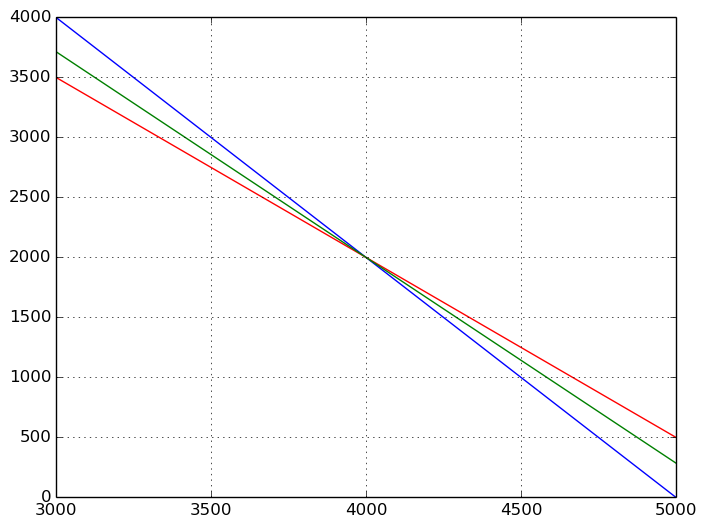

In [9]:
#Pkg.add("PyPlot")
using PyPlot
x = [3000:5000;]
x1 = [1:4000;]
x2 = [4000:5000;]
plotf(x1,n) = (n - 12*x1 )/7
plot(x, map(x -> c1(x),x),color="blue");     
plot(x, map(x -> c2(x),x), color="red");
plot(x, map(x -> plotf(x, 62000),x), color="green")


grid()

Producing 4000 bottles of red wine and 2000 bottles of white wine generates the maximum possible revenue of 62000€

## Calculate the solution with the simplex algorithm
Change sign of the cost function, to minimize the negative function, instead of maximizing the positive function
### First Step
$ N = \{ 1, 2 \} $

$ B = \{ 3 ,4 \} $

$A_N = \begin{pmatrix} 2 & 1\\ 3 & 3 \end{pmatrix}$ 

$A_B = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ 

$c_N = \begin{pmatrix} -12 \\ -7 \end{pmatrix}$

$c_B = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$

| | $x_1$ | $x_2$ |  |  |
| ----- | ----- | ----- | ----- | ----- |
| $x_3$ | 2 | 1 | 10000 | 5000 |
| $x_4$ | 3 | 2 | 16000 | 5333 | 
| | 12 | 7 | 0 | |  |

### Second Step
$ N = \{ 2 ,3 \}$

$ B= \{ 1 ,4 \} $

$A_N = \begin{pmatrix} 1 & 1\\ 2 & 0 \end{pmatrix}$ 

$ A_N^{-1} = \begin{pmatrix} 0 & 0.5\\ 1 & -0.5 \end{pmatrix}$ 

$A_B = \begin{pmatrix} 2 & 0 \\ 3 & 1 \end{pmatrix}$ 

$ A_B^{-1} = \begin{pmatrix} 0.5 & 0 \\ -1.5 & 1 \end{pmatrix}$ 

$ \Gamma_B^N = \begin{pmatrix} 0.5 & 0.5\\ 0.5 & -1.5 \end{pmatrix}$ 


$c_N = \begin{pmatrix} 7 \\ 0 \end{pmatrix}$

$c_B = \begin{pmatrix} 12 \\ 0 \end{pmatrix}$

| | $x_2$ | $x_3$ |  |  |
| ----- | ----- | ----- | ----- | ----- |
| $x_1$ | 0.5 | 0.5 | 5000 | 10000 |
| $x_4$ | 0.5 | -1.5 | 1000 | 2000 | 
| | 1 | -6 | -60000 | |

### Third Step
$ N = \{ 3 ,4 \}$

$ B= \{ 1 ,2 \} $

$A_N = \begin{pmatrix} 1 & 0\\ 0 & 1 \end{pmatrix}$ 

$ A_N^{-1} = \begin{pmatrix} 1 & 0\\ 0 & 1 \end{pmatrix}$ 

$A_B = \begin{pmatrix} 2 & 1 \\ 3 & 2 \end{pmatrix}$ 

$ A_B^{-1} = \begin{pmatrix} 2 & -1 \\ -3 & 2 \end{pmatrix}$ 

$ \Gamma_B^N = \begin{pmatrix} 2 & 1\\ -3 & 2 \end{pmatrix}$ 


$c_N = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$

$c_B = \begin{pmatrix} -12 \\ -7 \end{pmatrix}$

| | $x_3$ | $x_4$ |  | 
| ----- | ----- | ----- | ----- |
| $x_1$ | 2 | -1 | 4000 |
| $x_2$ | -3 | 2 | 2000 |
| | -3 | -3 | -62000 |

We stop because all $\zeta$ are negative, which means we have an optimal point. The same values as with the graphical approach.

## Using the linprog function
In Julia the name is the same as in matlab

In [7]:
#VERSION >= v"0.4" && splice!(Base.LOAD_CACHE_PATH, 3) # if not working
#Pkg.add("Clp")
using MathProgBase, Clp

solution = linprog([-12, -7], [2 1 ; 3 2] ,'<',[10000, 16000],ClpSolver())
solution

MathProgBase.HighLevelInterface.LinprogSolution(:Optimal,-62000.0,[4000.0,2000.0],Dict{Any,Any}(:redcost=>[0.0,0.0],:lambda=>[-3.0,-2.0]))

In [4]:
# using the simplex algorithm
solution = linprog([-12, -7], [2 1 ; 3 2] ,'<',[10000, 16000],ClpSolver(SolveType=0,LogLevel=2)) #SolveType=0 uses the primal simplex algorithm
solution

Coin0506I Presolve 2 (0) rows, 2 (0) columns and 4 (0) elements
Clp0033I Presolve took 0.00 seconds (total 0.00)
Clp1001I Initial range of elements is 1 to 3
Clp1003I Final range of elements is 0.75 to 1
Clp0022I Absolute values of scaled rhs range from 5000 to 4.611686e+18, minimum gap 3.0744573e+18
Clp0020I Absolute values of scaled objective range from 10.5 to 12
Clp0006I 0  Obj 0 Dual inf 22.5 (2)
Clp0006I 0  Obj 0 Dual inf 22.5 (2)
Clp0006I 2  Obj -62000
Clp0017I Looking optimal with tolerance of 1e-07
Clp0000I Optimal - objective value -62000
Clp0033I Dual took 0.00 seconds (total 0.00)
Clp0032I Optimal objective -62000 - 2 iterations time 0.002


MathProgBase.HighLevelInterface.LinprogSolution(:Optimal,-62000.0,[4000.0,2000.0],Dict{Any,Any}(:redcost=>[0.0,0.0],:lambda=>[-3.0,-2.0]))

## Defining additional constraints
The export rules in the winemakers home country define, that you may not export more then twice the amount of one type of wine then the of other:
* $x_2 \le 2x_1$ 
* $2x_2 \ge x_1$ 

The winemaker only has access to 5500 empty bottles, that can be filled:
* $x_1 + x_2 \le 5500$

In her last will, the winemakers mother bequeathed him the winery under the condition, that he produces at least 2000 bottles of her favorite white wine per year:
* $x_2 \ge 2000$


In [5]:
solution = linprog([-12, -7], [2 1 ; 3 2 ; 1 -2; -2 1; 1 1; 0 -1] ,'<',[10000, 16000, 0, 0, 5500, -2000],ClpSolver(SolveType=1, LogLevel=1))
solution

Coin0506I Presolve 5 (-1) rows, 2 (0) columns and 10 (-1) elements
Clp0006I 0  Obj -14000 Primal inf 1000 (1) Dual inf 1e+10 (1)
Clp0006I 1  Obj -56000
Clp0000I Optimal - objective value -56000
Coin0511I After Postsolve, objective -56000, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -56000 - 1 iterations time 0.002, Presolve 0.00


MathProgBase.HighLevelInterface.LinprogSolution(:Optimal,-56000.0,[3500.0,2000.0],Dict{Any,Any}(:redcost=>[0.0,0.0],:lambda=>[0.0,0.0,0.0,0.0,-12.0,-5.0]))

Despite our best efforts to increase the number of iterations by adding bogus constraints, we could not get more then 2 out of it. Most of the time, we event decreased to one.